### Import Libraries

In [ ]:

import numpy as np
import pandas as pd
import glob
import time
import pandas as pd



import os
import matplotlib.pyplot as plt
import keras

import cv2

In [ ]:
df=pd.read_csv('XSS_dataset.csv', encoding='utf-8-sig')

In [ ]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [ ]:
df=df[df.columns[-2:]]

In [ ]:
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [ ]:

sentences=df['Sentence'].values
sentences[1]

'<tt onmouseover="alert(1)">test</tt>'

In [ ]:
print(len(sentences))

13686


In [ ]:


def convert_to_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:


        """Some characters have values very big e.d 8221 adn some are chinese letters
        I am removing letters having values greater than 8222 and for rest greater
        than 128 and smaller than 8222 assigning them values so they can easily be normalized"""

        if(ord(i)<8222):

            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(134)


            if(ord(i)==8221): # ”  :  8221
                sentence_ascii.append(129)

            if(ord(i)==8220): # “  :  8220
                sentence_ascii.append(130)


            if(ord(i)==8216): # ‘  :  8216
                sentence_ascii.append(131)

            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(132)

            if(ord(i)==8211): # –  :  8211
                sentence_ascii.append(133)


            """
            If values less than 128 store them else discard them
            """
            if (ord(i)<=128):
                    sentence_ascii.append(ord(i))

            else:
                    pass


    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)



    return zer


In [ ]:




arr=np.zeros((len(sentences),100,100))

for i in range(len(sentences)):

    image=convert_to_ascii(sentences[i])

    x=np.asarray(image,dtype='float')
    image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    image/=128

    arr[i]=image



In [ ]:
print("Input data shape : ", arr.shape)

Input data shape :  (13686, 100, 100)


In [ ]:

data = arr.reshape(arr.shape[0], 100, 100, 1)

In [ ]:
data.shape

(13686, 100, 100, 1)

In [ ]:
y=df['Label'].values

In [ ]:

from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y, test_size=0.2, random_state=42)

In [ ]:

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization

In [ ]:
# A basic CNN Model
# Number of layers = 11
# Number of Convolutional layer: 3

model=tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 256)       0

In [ ]:
# Stop when validation accuracy > 97

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.97):
            print(" \n Reached 97% + validation accuracy")
            self.model.stop_training=True
callbacks = myCallback()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13686 entries, 0 to 13685
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13686 non-null  int64 
 1   Sentence    13686 non-null  object
 2   Label       13686 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 320.9+ KB
None

First Few Rows of the Dataset:
   Unnamed: 0                                           Sentence  Label
0           0  <li><a href="/wiki/File:Socrates.png" class="i...      0
1           1               <tt onmouseover="alert(1)">test</tt>      1
2           2  \t </span> <span class="reference-text">Steeri...      0
3           3  \t </span> <span class="reference-text"><cite ...      0
4           4  \t </span>. <a href="/wiki/Digital_object_iden...      0

Missing Values:
Unnamed: 0    0
Sentence      0
Label         0
dtype: int64

Summary Statistics for Numerical Features:
         Unnamed: 0         

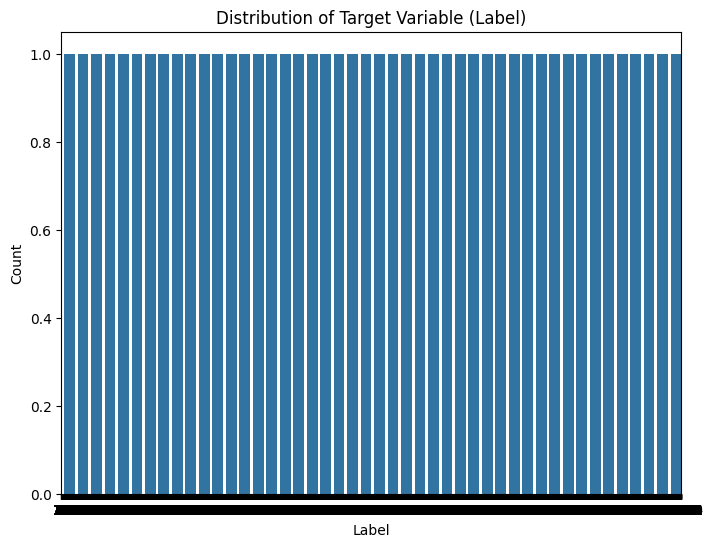

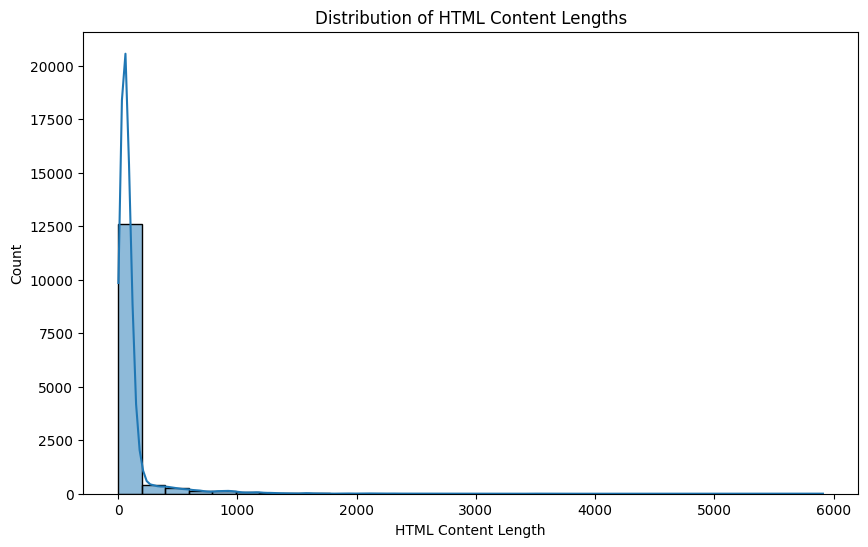

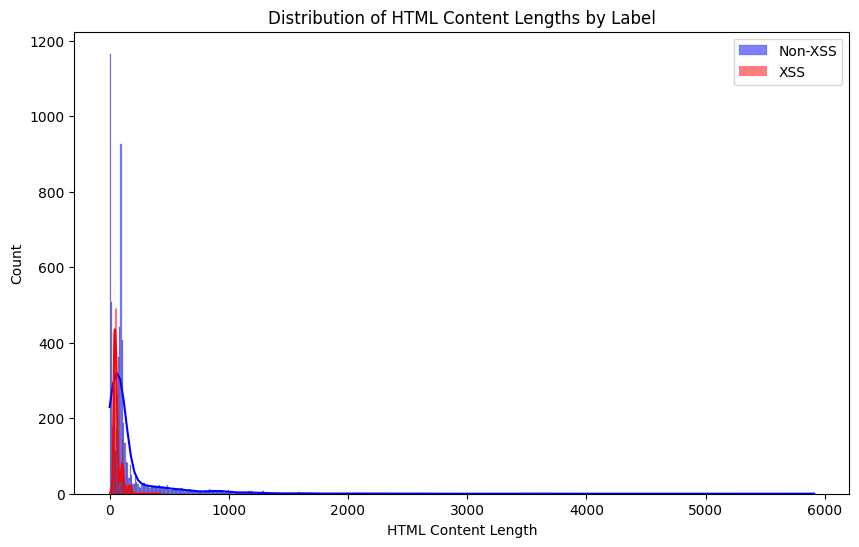

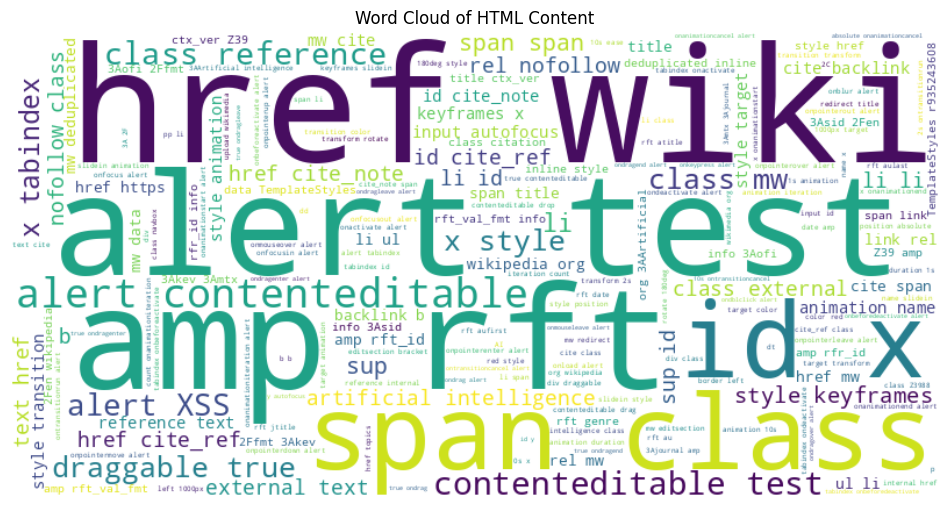

In [ ]:

!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/content/XSS_dataset.csv")


print("Dataset Information:")
print(data.info())


print("\nFirst Few Rows of the Dataset:")
print(data.head())


missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

print("\nSummary Statistics for Numerical Features:")
print(data.describe())


plt.figure(figsize=(8, 6))
sns.countplot(data['Label'])
plt.title('Distribution of Target Variable (Label)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


data['Sentence_length'] = data['Sentence'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentence_length'], bins=30, kde=True)
plt.title('Distribution of HTML Content Lengths')
plt.xlabel('HTML Content Length')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data[data['Label'] == 0]['Sentence_length'], color='blue', label='Non-XSS', kde=True)
sns.histplot(data[data['Label'] == 1]['Sentence_length'], color='red', label='XSS', kde=True)
plt.title('Distribution of HTML Content Lengths by Label')
plt.xlabel('HTML Content Length')
plt.ylabel('Count')
plt.legend()
plt.show()


from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Sentence']))
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of HTML Content')
plt.axis('off')
plt.show()




In [ ]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY)
#                        callbacks=[callbacks]
                     )

Epoch 1/10
86/86 [==============================] - 638s 7s/step - loss: 0.4569 - accuracy: 0.7782 - val_loss: 0.3847 - val_accuracy: 0.8068
Epoch 2/10
86/86 [==============================] - 601s 7s/step - loss: 0.2160 - accuracy: 0.9198 - val_loss: 0.0995 - val_accuracy: 0.9701
Epoch 3/10
86/86 [==============================] - 598s 7s/step - loss: 0.0743 - accuracy: 0.9780 - val_loss: 0.0675 - val_accuracy: 0.9825
Epoch 4/10
86/86 [==============================] - 594s 7s/step - loss: 0.0528 - accuracy: 0.9855 - val_loss: 0.0556 - val_accuracy: 0.9869
Epoch 5/10
86/86 [==============================] - 602s 7s/step - loss: 0.0489 - accuracy: 0.9868 - val_loss: 0.0497 - val_accuracy: 0.9883
Epoch 6/10
86/86 [==============================] - 603s 7s/step - loss: 0.0424 - accuracy: 0.9875 - val_loss: 0.0602 - val_accuracy: 0.9788
Epoch 7/10
86/86 [==============================] - 644s 8s/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0536 - val_accuracy: 0.9847
Epoch 8/10
86

86/86 [==============================] - 69s 804ms/step


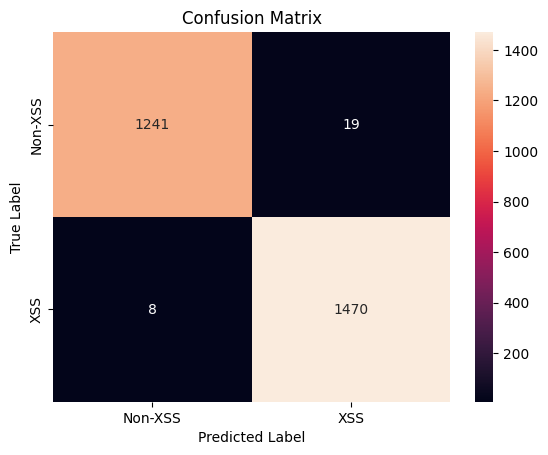

In [ ]:


from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = model.predict(testX)


y_pred_binary = [int(round(p[0])) for p in y_pred]


cm = confusion_matrix(testY, y_pred_binary)


labels = ['Non-XSS', 'XSS']


sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:


metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Validation Accuracy', 'Loss', 'Validation Loss', 'Precision', 'Recall'],
    'Value': [
        model_log.history['accuracy'][-1],
        model_log.history['val_accuracy'][-1],
        model_log.history['loss'][-1],
        model_log.history['val_loss'][-1],
        precision,
        recall
    ]
})

print(metrics_df.to_string())


                Metric     Value
0             Accuracy  0.992784
1  Validation Accuracy  0.990139
2                 Loss  0.023593
3      Validation Loss  0.038781
4            Precision  0.987240
5               Recall  0.994587
